# Import packages and read data set

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data create data frame
df = pd.read_csv('Data/Mall_customers.csv')

In [3]:
# Examine data set columns
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Examine length of data set
len(df)

200

# Exploartory Univariate Analysis

In [5]:
# Explore data set
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


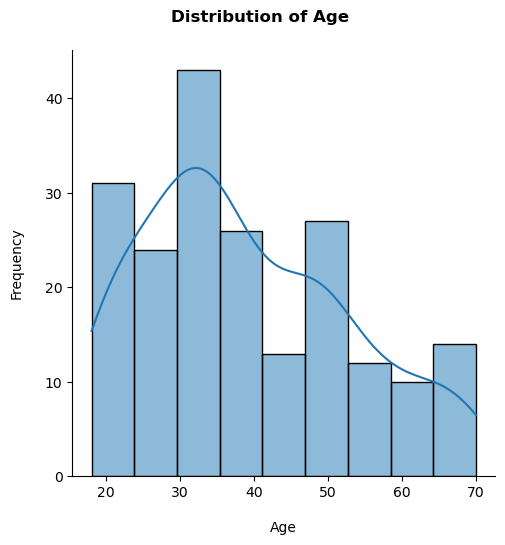

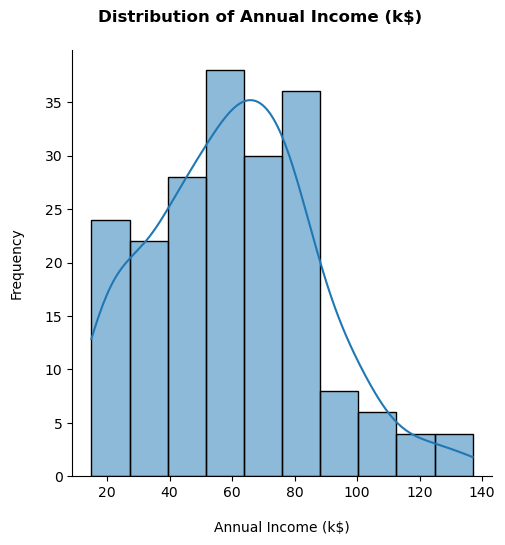

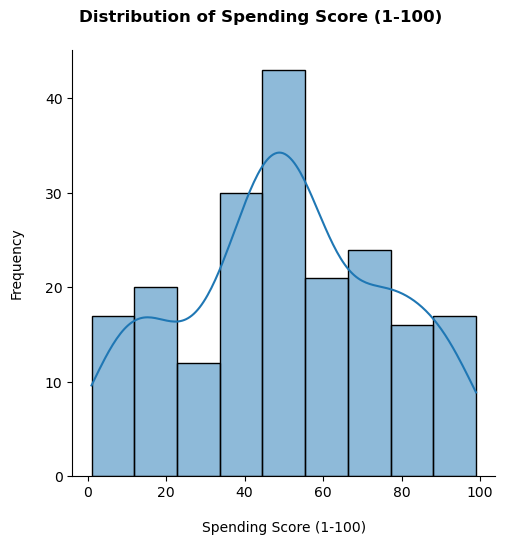

In [6]:
# Plot frequency of Age, Annual income and Spending score
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for idx, column in enumerate(columns):
    g = sns.displot(df[column], kde=True)
    g.fig.suptitle(f'Distribution of {column}', fontweight='bold', y=1.05)  # Adjust y for padding
    g.set_axis_labels(columns[idx], 'Frequency', labelpad=15)  # Set x-label and y-label
    g.savefig(f'images/distribution_of_{column.lower().replace(" ", "_")}.png', dpi=300)
    plt.show()

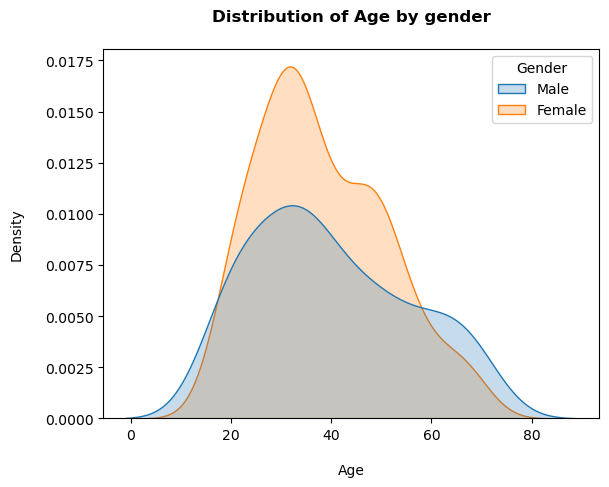

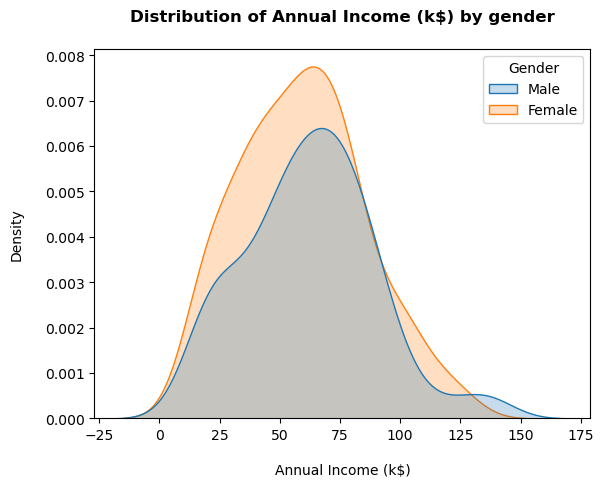

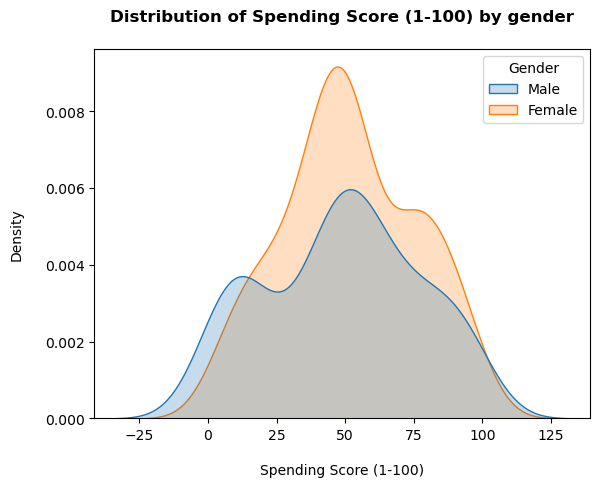

In [7]:
# Plot the same graphs but divided on Male and Female
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for idx, column in enumerate(columns):
    sns.kdeplot(data=df, x=column, hue='Gender', shade=True)
    plt.title(f'Distribution of {column} by gender', fontweight='bold', pad=20)
    plt.xlabel(column, labelpad=15)
    plt.ylabel('Density', labelpad=15)
    
    plt.savefig(f'images/distribution_of_{column.lower().replace(" ", "_")}__by_gender.png', dpi=300, bbox_inches='tight')
    plt.show()

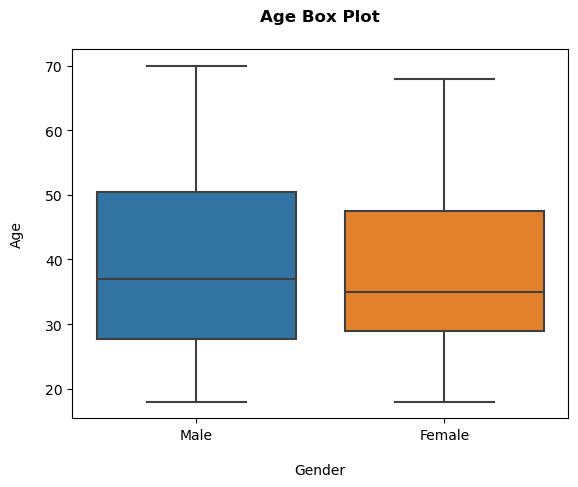

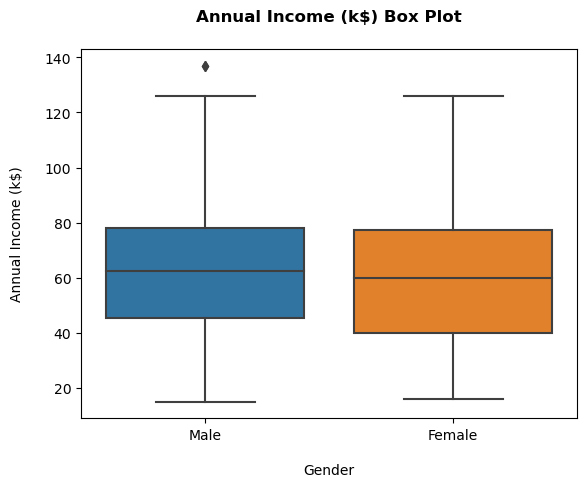

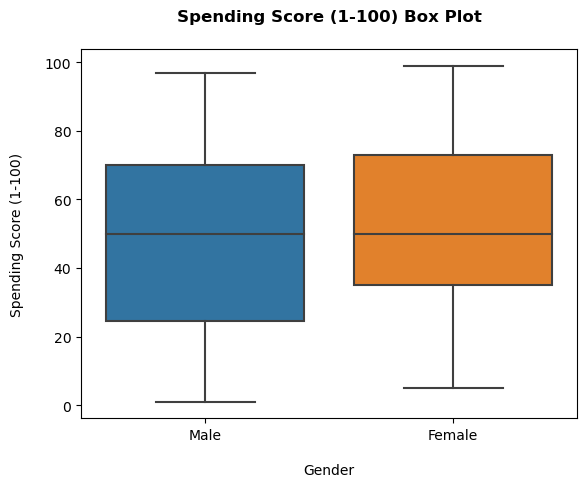

In [8]:
# Plot box diagrams for Age, Annual income and Spending score for the respective groups Male and Female
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for idx, column in enumerate(columns):
    sns.boxplot(data=df, x='Gender', y=column)
    
    plt.title(f'{column} Box Plot', fontweight='bold', pad=20)
    plt.xlabel('Gender', labelpad=15)
    plt.ylabel(column, labelpad=15)
    
    plt.savefig(f'images/box_plot_of_{column.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
# Calculate share of each gender
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Exploratory Bivariate Analysis

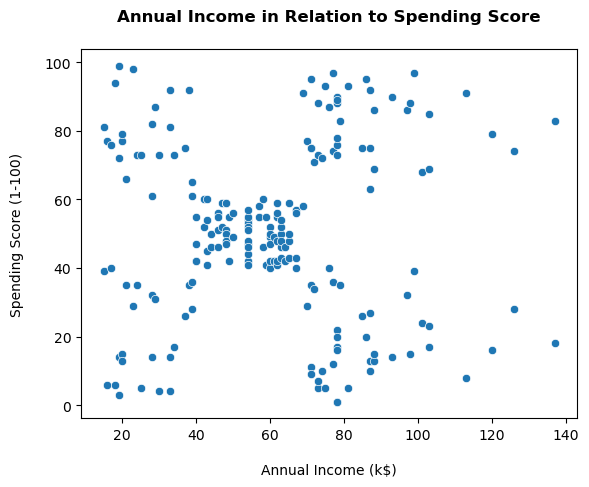

In [10]:
# Create scatterplot of Annual income in relation to spending score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

plt.title('Annual Income in Relation to Spending Score', fontweight='bold', pad=20)
plt.xlabel('Annual Income (k$)', labelpad=15)
plt.ylabel('Spending Score (1-100)', labelpad=15)

plt.savefig('Images/spending_score_annual_income_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

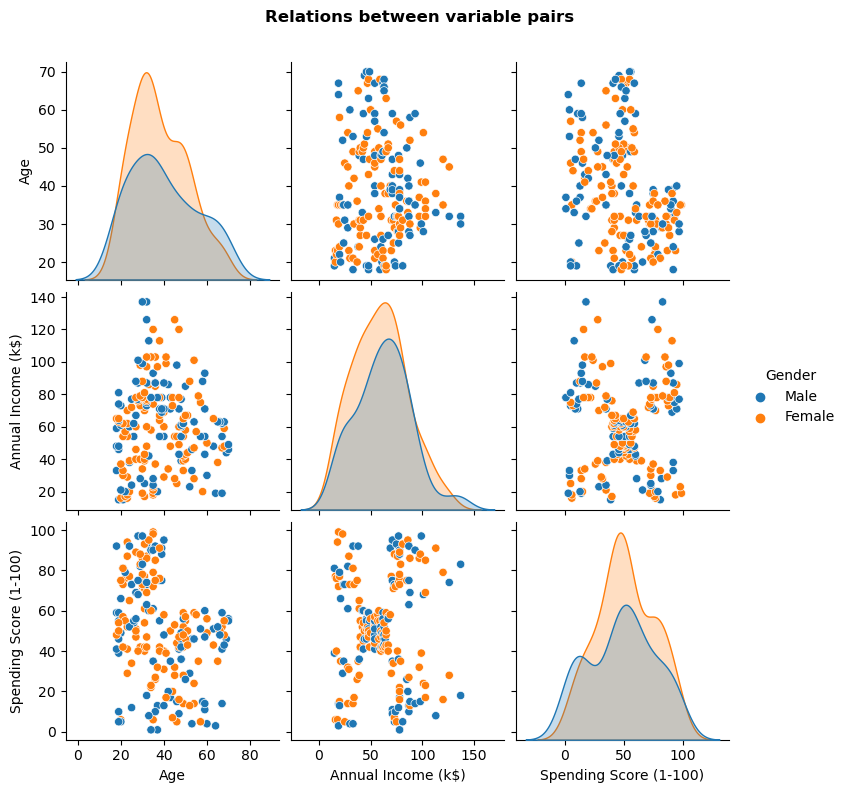

In [11]:
# Plot the different pair relations of the columns (not including CustomerID)
df=df.drop('CustomerID', axis=1)
g = sns.pairplot(df, hue='Gender')

g.fig.suptitle('Relations between variable pairs', fontweight='bold', y=1.05)

g.savefig('Images/relations_between_variable_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Calculate means for each gender
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


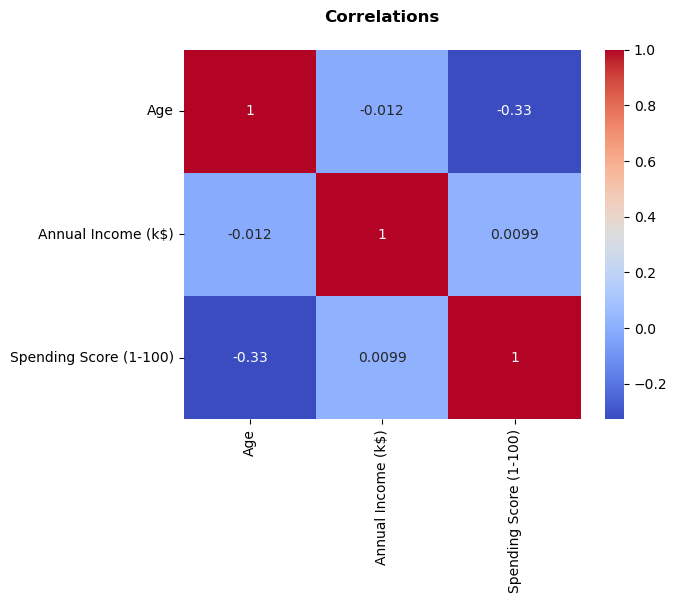

In [13]:
# Visualize correlations in heatmap
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlations', fontweight='bold', pad=20)

plt.savefig('Images/correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Univariate Clustering

In [14]:
# Create a KMeans clustering model with 3 clusters (Based on elbow method, see further down)
clustering1 = KMeans(n_clusters=3)

In [15]:
# Fit the KMeans clustering model to the 'Annual Income (k$)' column of the dataframe
clustering1.fit(df[['Annual Income (k$)']].values)

KMeans(n_clusters=3)

In [16]:
# Get the cluster labels assigned to each data point by the KMeans clustering model
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [17]:
# Add a new column to the dataframe containing the cluster labels assigned to each data point
df['Income Cluster'] = clustering1.labels_

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [19]:
# See how many customers belong to each cluster
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [20]:
# Get the inertia of the KMeans clustering model
clustering1.inertia_

23517.33093093093

In [21]:
# Create a list of the inertia scpres through the range of 1 to 10 clusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3972.3214285714275,
 2880.457936507939,
 2248.1293226381467,
 1770.448412698414]

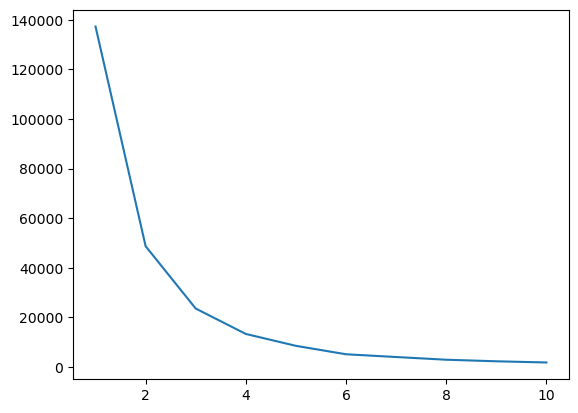

In [23]:
# Plot inertia scores
# Elbow was identified at n = 3
plt.plot(range(1,11),inertia_scores)
plt.show()

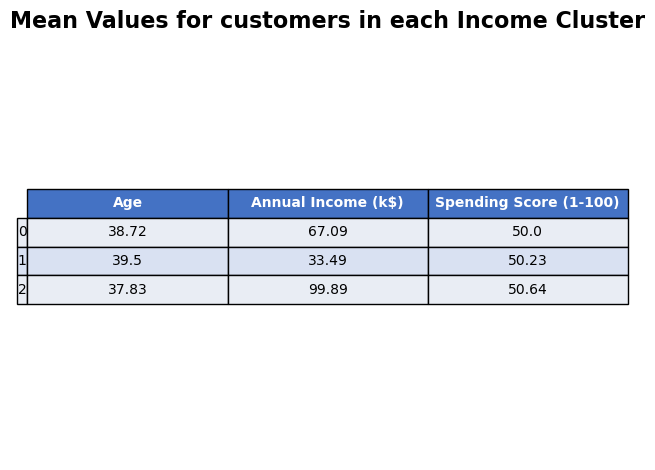

In [24]:
# Calculate mean values for each cluster
result = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
result = result.round(2)

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=result.values,
                 rowLabels=result.index,
                 colLabels=result.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4472C4')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')
    else:
        cell.set_facecolor('#E9EDF4')

plt.title('Mean Values for customers in each Income Cluster', fontweight='bold',fontsize=16, pad=0)
plt.tight_layout()
plt.savefig('Images/income_cluster_averages.png', dpi=300, bbox_inches='tight')
plt.show()

# Bivariate Clustering

In [25]:
# Create a KMeans clustering model with 5 clusters (Based on elbow method, see further down)
# Fit the KMeans clustering model to the 'Annual Income (k$) AND Spending Score (1-100) columns of the dataframe
# Get the cluster labels assigned to each data point by the KMeans clustering model
clustering2 = KMeans(n_clusters = 5)
clustering2 = clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,0
2,Female,20,16,6,1,1
3,Female,23,16,77,1,0
4,Female,31,17,40,1,1


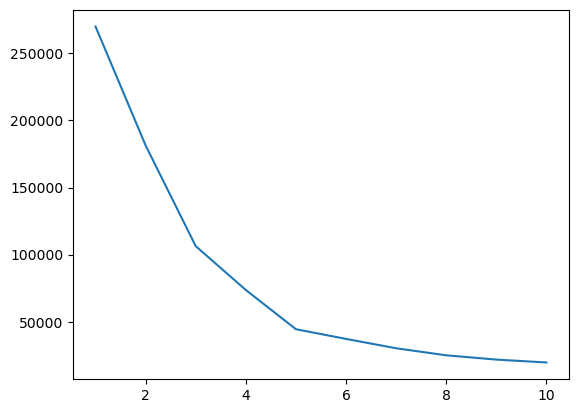

In [26]:
# Create a list of the inertia scores through the range of 1 to 10 clusters
# Plot
# 5 can be identified as an appropariate number for n using the elbow method
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)
plt.show()

In [27]:
# Create a DataFrame for the centers of the clusters
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

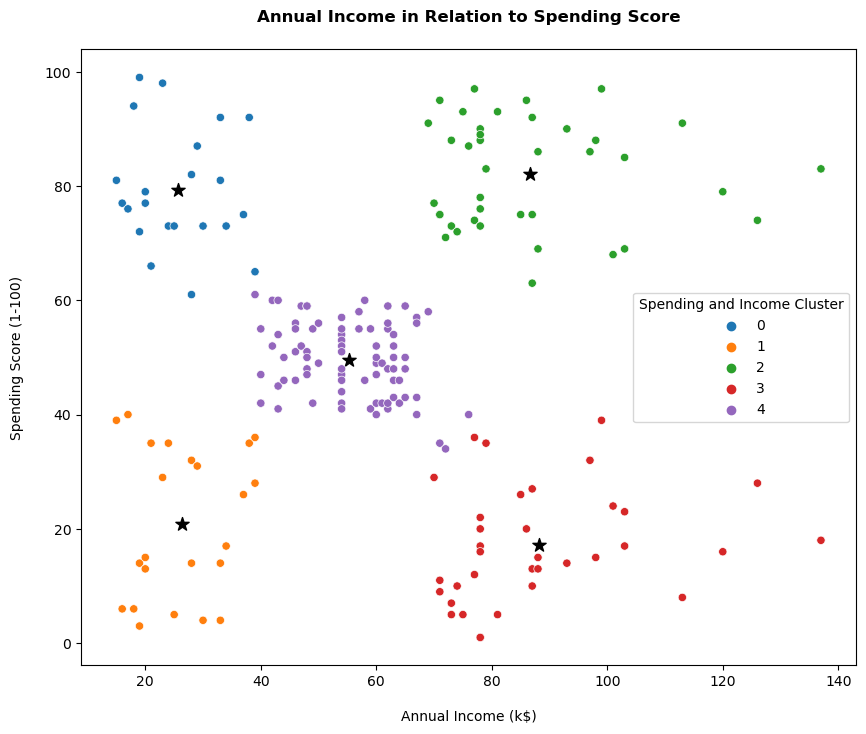

In [28]:
# Plot the clusters as well as the centers. Showing the relation between Spending Score and Annual Income
plt.figure(figsize = (10,8))

plt.scatter(x = centers['x'], y = centers['y'], s= 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')

plt.title('Annual Income in Relation to Spending Score', fontweight='bold', pad=20)
plt.xlabel('Annual Income (k$)', labelpad=15)
plt.ylabel('Spending Score (1-100)', labelpad=15)

plt.savefig('Images/clustering_bivariate.png', dpi=300, bbox_inches='tight')
plt.show()

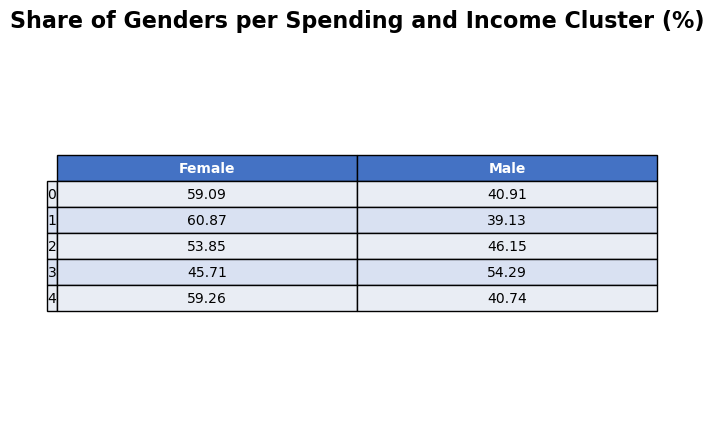

In [29]:
# Calculate the percentage of genders per spending and income cluster
share_genders = pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')
share_genders = (share_genders * 100).round(2)

fig, ax = plt.subplots()

ax.axis('off')

table = ax.table(cellText=share_genders.values,
                 rowLabels=share_genders.index,
                 colLabels=share_genders.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4472C4')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')
    else:
        cell.set_facecolor('#E9EDF4')

plt.title('Share of Genders per Spending and Income Cluster (%)', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.savefig('images/gender_percentage_by_spending_and_income_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

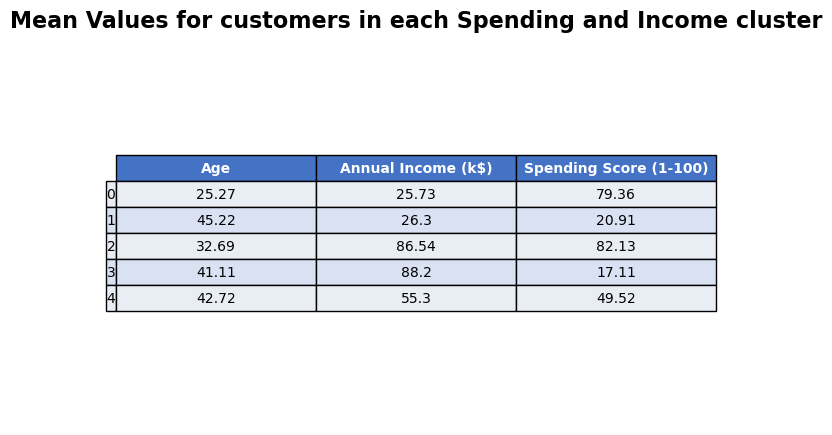

In [30]:
# Calculate the average values for each spending and income cluster
cluster_averages = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_averages = cluster_averages.round(2)

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=cluster_averages.values,
                 rowLabels=cluster_averages.index,
                 colLabels=cluster_averages.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4472C4')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')
    else:
        cell.set_facecolor('#E9EDF4')


plt.title('Mean Values for customers in each Spending and Income cluster', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.savefig('images/average_values_by_spending_and_income_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

# Multivariate clustering

In [31]:
# Below follows a similar analysis as the bivariate clustering but for multivariate clustering

In [32]:
# Convert 'Gender' column to numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [33]:
# Create a KMeans clustering model with 5 clusters (Based on elbow method, see further down)
# Fit the KMeans clustering model to the 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'Gender_Male' columns of the dataframe
# Get the cluster labels assigned to each data point by the KMeans clustering model
clustering_multi = KMeans(n_clusters=5)
clustering_multi = clustering_multi.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])
df['Multi-feature Cluster'] = clustering_multi.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male,Multi-feature Cluster
0,19,15,39,1,1,True,4
1,21,15,81,1,0,True,3
2,20,16,6,1,1,False,4
3,23,16,77,1,0,False,3
4,31,17,40,1,1,False,4


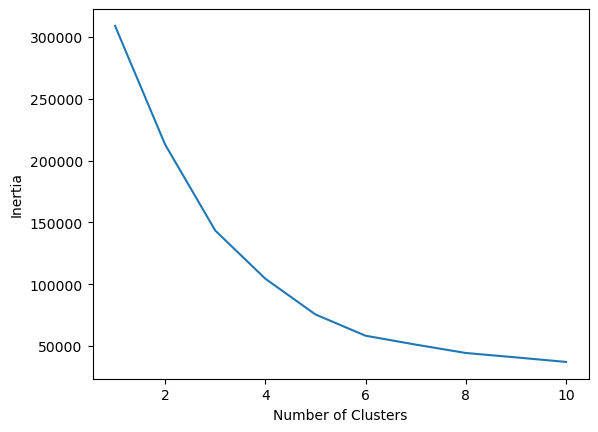

In [34]:
# Create a list of the inertia scores through the range of 1 to 10 clusters
# 5 can be identified as an appropriate number for n using the elbow method
inertia_scores_multi = []
for i in range(1, 11):
    kmeans_multi = KMeans(n_clusters=i)
    kmeans_multi.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])
    inertia_scores_multi.append(kmeans_multi.inertia_)
plt.plot(range(1, 11), inertia_scores_multi)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
# Create a DataFrame for the centers of the clusters
centers_multi = pd.DataFrame(clustering_multi.cluster_centers_)
centers_multi.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

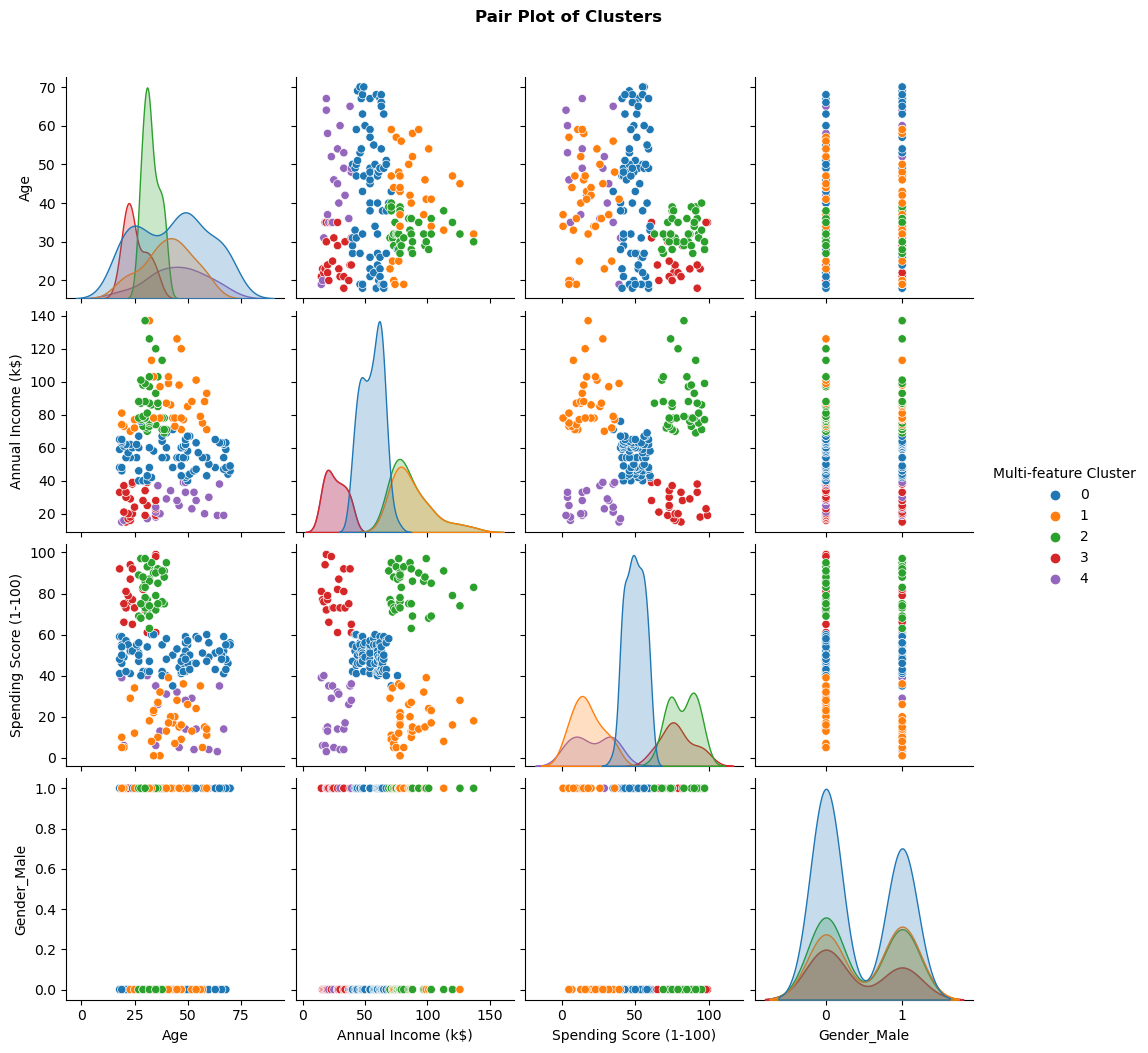

In [42]:
# Plot the clusters using a pair plot
sns.pairplot(df, hue='Multi-feature Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], palette='tab10')
plt.suptitle('Pair Plot of Clusters', y=1.05, fontweight='bold')
plt.savefig('Images/clustering_multivariate.png', dpi=300, bbox_inches='tight')
plt.show()

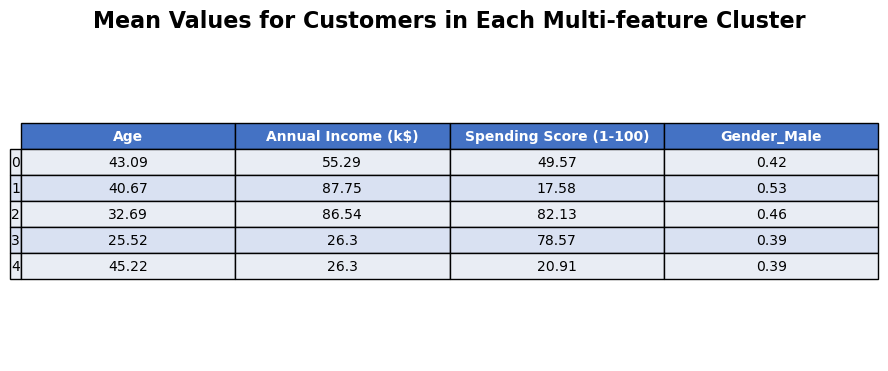

In [37]:
# Calculate the average values for each cluster
cluster_averages_multi = df.groupby('Multi-feature Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']].mean()
cluster_averages_multi = cluster_averages_multi.round(2)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

table = ax.table(cellText=cluster_averages_multi.values,
                 rowLabels=cluster_averages_multi.index,
                 colLabels=cluster_averages_multi.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4472C4')
    elif row % 2 == 0:
        cell.set_facecolor('#D9E1F2')
    else:
        cell.set_facecolor('#E9EDF4')

plt.title('Mean Values for Customers in Each Multi-feature Cluster', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.savefig('images/average_values_by_multi_feature_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# Conlusion from the multivariate clustering is that the cluster with a high spending score and high annual income is most relevant since this means that it can be an attractive customer segment for us to run campaigns for. 
# These customers are on average 33 years old and the segment comprises slightly more females (54%) than males (46%)